In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from nano_lab import experiments
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('../src/plotstyle.mplstyle')
exp= experiments('nano-lab','nsom','fg163r',False)
exp.dframe



,No. Dir,Name Dir
0,0,2022-10-20-nsom.h5
1,1,2022-10-23-nsom.h5
2,2,2022-10-25-nsom.h5


In [ ]:
file ='/media/labfiles/lab-exps/nano-lab/fg163r/2022-10-25-nsom.h5'
opendat = h5.File(file,'r')


In [ ]:
sample='fg163r'
dsets = []
h5path= []
alldata=[]
ptable=[]
measures=[]
count=0
path='/media/labfiles/lab-exps/nano-lab/'
for (dirpath, dirnames, filenames) in walk(path):
    if sample in dirpath:
        for name in sorted(glob.glob(dirpath+'/*.h5')):
            if 'nsom' in name:
                datac=[]
                measures.append(name.split('/')[-1])
                h5path.append(name)
                opendat = h5.File(name,'r')
                for iset in opendat.keys():
                    dsets.append(iset)
                    for jset in opendat[iset].keys():
                        datac.append(np.array(opendat[iset][jset]))
            alldata.append(datac)
            ptable.append([count,name.split('/')[-1]])
            count+=1              
                    


Run Frame No. : 10


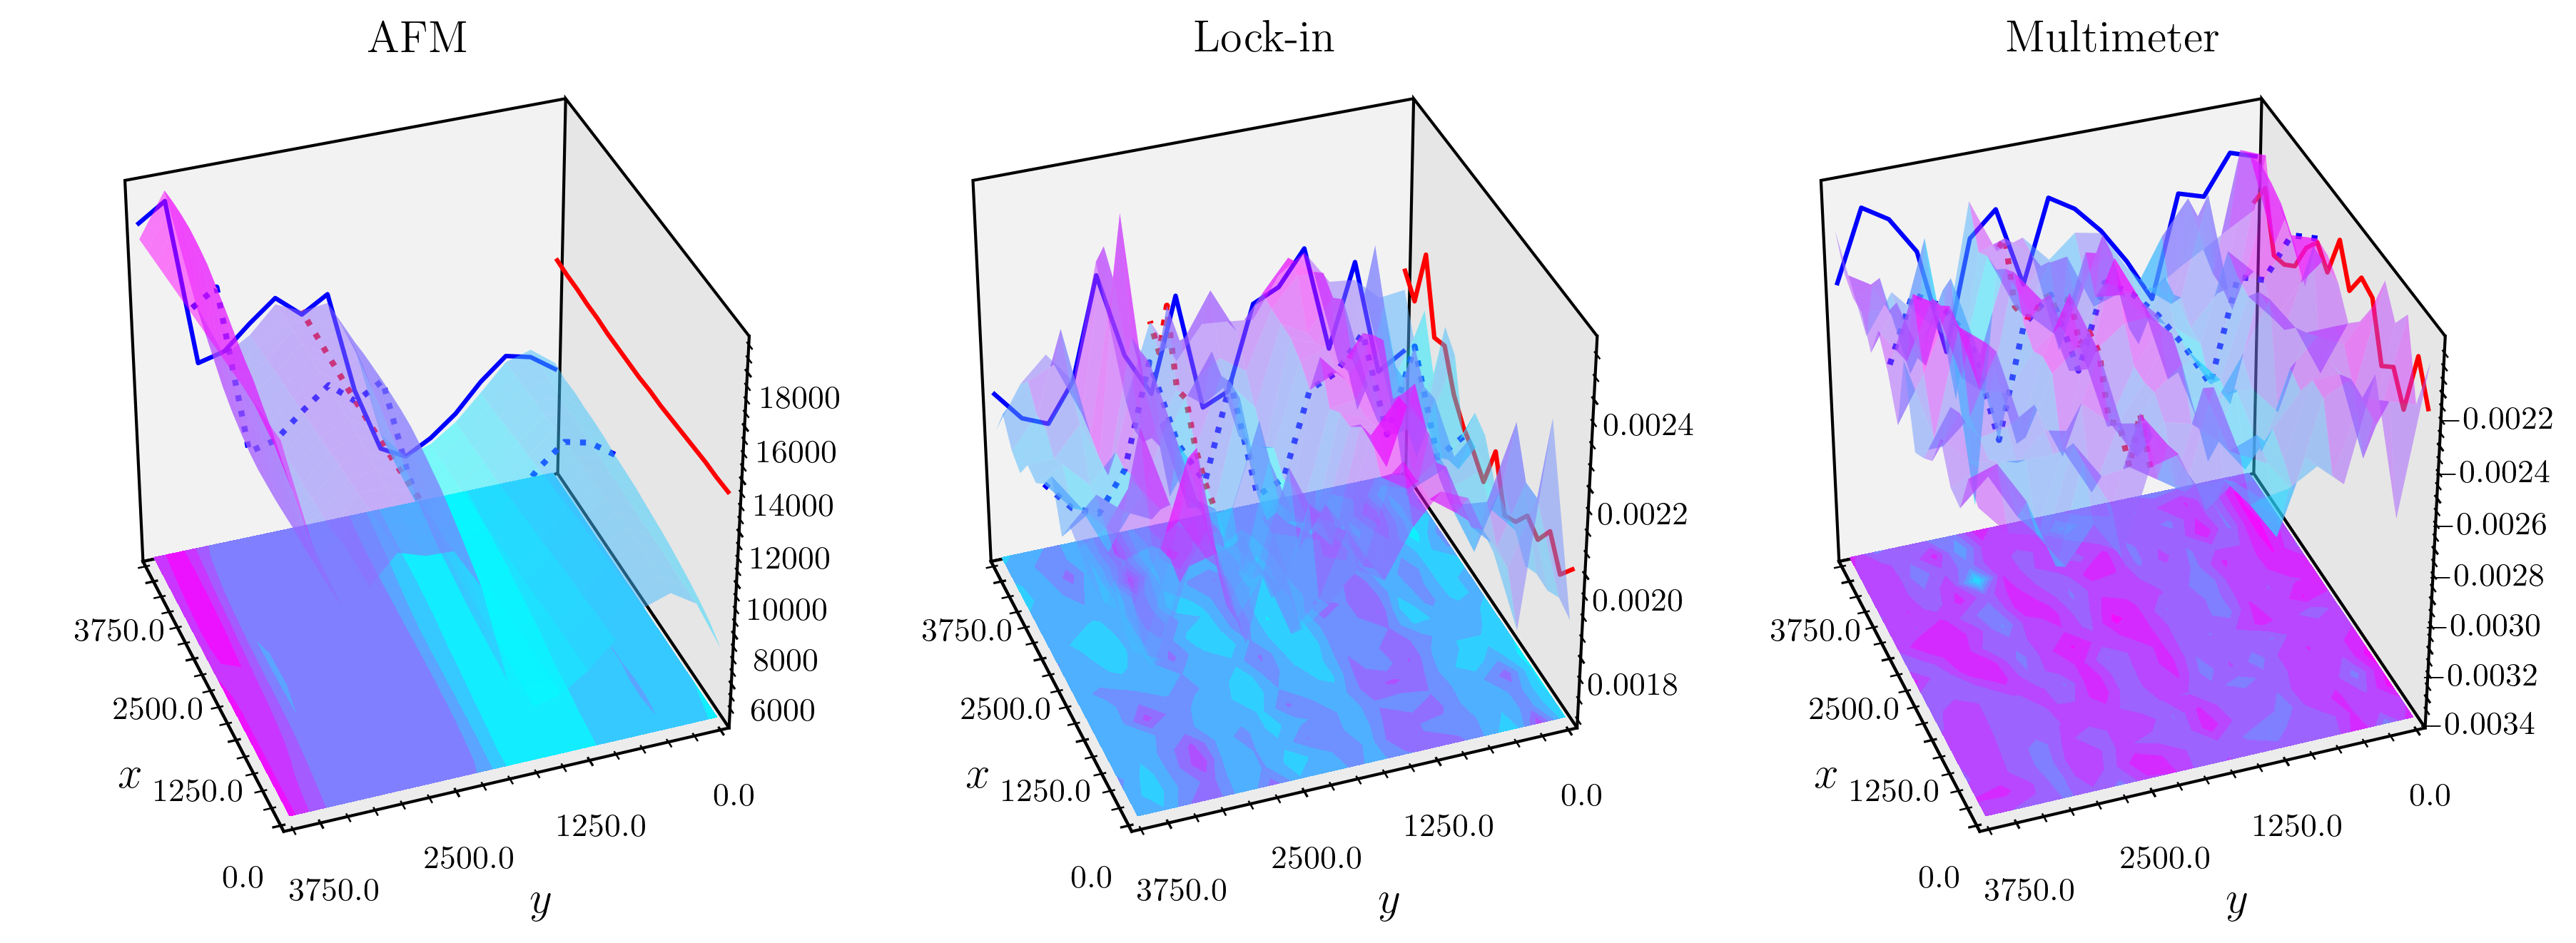

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import math
import warnings
warnings.filterwarnings("ignore")


class afm_nsom:
    def __init__(self,alldata,measure):
        self.alldata=alldata
        self.measure = measure
        self.afm_nsom_data = self.alldata[self.measure][0]
        self.xi=0;self.xf=self.afm_nsom_data.shape[1]
        self.yi=0;self.yf=self.afm_nsom_data.shape[0]
        self.afm         = self.afm_nsom_data[:,:,0]
        self.lockin      =  self.afm_nsom_data[:,:,1]
        self.multimeter  =  self.afm_nsom_data[:,:,2]


        try:
            self.amplitud = self.alldata[self.measure][1]
            self.fase = self.alldata[self.measure][2]
        except:
            pass


exptoanalysis =afm_nsom(exp.data,1)
afm    = exptoanalysis.afm
lockin =  exptoanalysis.lockin
multimeter =  exptoanalysis.multimeter
nx, ny = afm.shape[1], afm.shape[0]
x, y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))


plt.rcParams['xtick.labelsize']     = 11
plt.rcParams['ytick.labelsize']     = 11
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelpad'] = 5

def new_axislabels(ax,step):
    newlabels=[labels*step for labels in ax.get_xticks().tolist()]
    return newlabels

fig = plt.figure(figsize=(15,7))
G = gridspec.GridSpec(1, 3, wspace=0.07)# ax1 = fig.add_subplot(121, projection='3d')
# ax2 = fig.add_subplot(122)
ax1 = fig.add_subplot(G[0,0], projection='3d')
ax2 = fig.add_subplot(G[0,1], projection='3d')
ax3 = fig.add_subplot(G[0,2], projection='3d')
# fig.patch.set_visible(False)

def plotexps(ax1,ax2,ax3,afm,lockin,multimeter,line,comap,**kwargs):
    ax1.clear()
    surf=ax1.plot_surface(x, y,afm,cmap=comap,rstride=1, cstride=1, lw=1,  antialiased=True, shade=False,alpha=0.5)
    ax1.contourf(x, y,afm,zdir='z',cmap=comap,offset=afm.min()-2000,normalize="log",origin="lower")
    ax1.plot(x[:,line],y[:,line],afm[:,line],':b',lw=2)
    ax1.plot(x[line,:],y[line,:],afm[line,:],':r',lw=2)
    ax1.plot(y[:,line], afm[:,line], zs=x.max(), zdir='x', lw = 1.5, color = 'b')
    ax1.plot(x[line,:], afm[line,:], zs=x.min(), zdir='y', lw = 1.5, color = 'r')
    ax1.set_zlim([afm.min()-2000,afm.max()])
    ax1.set_title("AFM",fontsize=15)

    ax2.clear()
    lockinmin = lockin.min()-(lockin.min()/10)
    surf2=ax2.plot_surface(x, y,lockin,cmap=comap, rstride=1, cstride=1, lw=1, antialiased=True, shade=False,alpha=0.5)
    ax2.contourf(x, y,lockin,zdir='z',cmap=comap,offset=lockinmin,normalize="log",origin="lower")
    ax2.plot(x[:,line],y[:,line],lockin[:,line],':b',lw=2)
    ax2.plot(x[line,:],y[line,:],lockin[line,:],':r',lw=2)
    ax2.plot(y[:,line], lockin[:,line], zs=x.max(), zdir='x', lw = 1.5, color = 'b')
    ax2.plot(x[line,:], lockin[line,:], zs=x.min(), zdir='y', lw = 1.5, color = 'r')
    ax2.set_zlim([lockinmin,lockin.max()])
    ax2.set_title("Lock-in",fontsize=15)

    ax3.clear()
    multimetermin = multimeter.min()+(multimeter.min()/10)
    surf3=ax3.plot_surface(x, y,multimeter,cmap=comap, rstride=1, cstride=1, lw=1, antialiased=True, shade=False,alpha=0.5)
    ax3.contourf(x, y,multimeter,zdir='z',cmap=comap,offset=multimetermin,normalize="log",origin="lower")
    ax3.plot(x[:,line],y[:,line],multimeter[:,line],':b',lw=2)
    ax3.plot(x[line,:],y[line,:],multimeter[line,:],':r',lw=2)
    ax3.plot(y[:,line], multimeter[:,line], zs=x.max(), zdir='x', lw = 1.5, color = 'b')
    ax3.plot(x[line,:], multimeter[line,:], zs=x.min(), zdir='y', lw = 1.5, color = 'r')
    ax3.set_zlim([multimetermin,multimeter.max()])
    ax3.set_title("Multimeter",fontsize=15)

    for axs in fig.axes:
        axs.set_xlim(0.,16.)
        axs.set_ylim(0.,16.)
        axs.set_box_aspect((1, 1, 1))
        axs.grid(False)
        axs.set_xlabel(r'$x$',fontsize=15)
        axs.set_ylabel(r'$y$',fontsize=15)
        axs.locator_params(axis='x', nbins=5)
        axs.locator_params(axis='y', nbins=5)
        newlabels = new_axislabels(axs,250)
        axs.set_xticklabels(newlabels)
        axs.set_yticklabels(newlabels)
        axs.view_init(elev=35, azim=160)
        #axs.ticklabel_format(style='sci',axis='z',scilimits=(0,0))
        for axis in [axs.w_xaxis, axs.w_yaxis, axs.w_zaxis]:
            axis.line.set_linewidth(1)
            axis.pane.set_edgecolor('#000000')
            axis.pane.set_linewidth(1)
            axis.pane.set_alpha(1) 
    return fig
    
def animate(frame):
    clear_output(wait=True)
    print("Run Frame No. :",frame)
    return plotexps(ax1,ax2,ax3,afm,lockin,multimeter,frame,"cool")


animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,16)[::-1])

animate(10)



In [ ]:
# %%time

# animation.save('puppy2.mp4',  writer="ffmpeg",fps=4,progress_callback = lambda i, n:print(f'Saving frame {i} of {n}'))
#  #animation.save('SLIT3D.gif',writer='imagemagick',fps=10,dpi=100,progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'))n: print(f'Saving frame {i} of {n}'))
# plt.rcParams["animation.html"] = "jshtml"
# animation

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=afm,colorscale='Blues')])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AFM', autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),)

fig.show()


In [20]:
from turtle import width
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plotdata(afm,lockin,multimeter,**kwargs):
    fig = make_subplots(
        rows=1, cols=3,
        specs=[[{'type': 'surface'}, {'type': 'surface'},{'type': 'surface'}]],print_grid=False)

    # Generate data
    nx = afm.shape[0]
    ny = afm.shape[1]
    x = np.arange(0, nx, 1)
    y = np.arange(0, ny, 1)
    fig.add_trace(
        go.Surface( z=afm, colorscale='Plotly3',showscale=False),row=1, col=1)
    fig.update_traces(contours_x=dict(show=True, usecolormap=True, project_x=True))
    fig.update_traces(contours_y=dict(show=True, usecolormap=True, project_y=True))


    fig.add_trace(
        go.Surface(x=x, y=y, z=lockin, colorscale='Plotly3',showscale=False),row=1, col=2)
    fig.update_traces(contours_x=dict(show=True, usecolormap=True, project_x=True))
    fig.update_traces(contours_y=dict(show=True, usecolormap=True, project_y=True))
    # fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))

    fig.add_trace(
        go.Surface(x=x, y=y, z=multimeter, colorscale='Plotly3',showscale=False),row=1, col=3)
    # fig.update_traces(contours_z=dict(show=True, usecolormap=True,highlightcolor="limegreen", project_z=True))


    fig.update_layout(
            template="plotly_dark",
        title_text='AFM, Lockin, Multimeter data results',
        width=1200,
        margin=dict(l=50, r=0, b=50, t=35),
        scene = dict(xaxis = dict(range=[-1,16+1]),yaxis = dict(range=[-1,16+1])),
    )
    fig.update_layout(scene_aspectmode='auto')
    fig.update_layout(scene2_aspectmode='auto')
    fig.update_layout(scene3_aspectmode='auto')
        



    fig.show()
plotdata(afm,lockin,multimeter)

Layout({
    'font': {'family': 'Computer Modern Roman,serif', 'size': 13},
    'scene': {'domain': {'x': [0.0, 0.2888888888888889], 'y': [0.0, 1.0]}},
    'scene2': {'domain': {'x': [0.35555555555555557, 0.6444444444444445], 'y': [0.0, 1.0]}},
    'scene3': {'domain': {'x': [0.7111111111111111, 1.0], 'y': [0.0, 1.0]}},
    'template': '...',
    'width': 1200,
    'xaxis': {'title': {'text': '$x$ (nm)'}},
    'yaxis': {'title': {'text': '$y (nm)$'}}
})

In [84]:
from turtle import color
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
        rows=1, cols=3,
        specs=[[{'type': 'surface'}, {'type': 'surface'},{'type': 'surface'}]],print_grid=False)

    # Generate data
nx = afm.shape[0]
ny = afm.shape[1]
x = np.arange(0, nx, 1)
y = np.arange(0, ny, 1)

exp2plots = [afm,lockin,multimeter]
for i,expriment in enumerate(exp2plots):
    fig.add_trace(
        go.Surface( z=expriment, colorscale='Plotly3',showscale=False),row=1, col=i+1)
    fig.update_traces(contours_x=dict(show=True, usecolormap=True, project_x=True))
    fig.update_traces(contours_y=dict(show=True, usecolormap=True, project_y=True))

fig.update_layout(
     template="plotly_dark",
     width=1200,
    xaxis_title=r'$x$ (nm)',
    yaxis_title=r'$y (nm)$',
    font=dict(
        family="Computer Modern Roman,serif",
        color='black',
        size=13,
    )
)

fig.show()
